# Prediction of Creditworthiness of Customers and Customer Loan Repayment

# Problem statements
1. Prediction of Creditworthiness of Customers 
2. Prediction of Customer Loan Repayment

# Dataset Description
- Lending data from 2007-2010
- Classifying and predicting if the customer meets credit underwriting criteria and if the customer will repay the loan fully.
- The prediction result could be a reference for financial institutions or banks for the consideration of approving the loan or not.
- Description of the columns in the dataset:
1. credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
2. purpose: The purpose of the loan (takes values "creditcard", "debtconsolidation", "educational", "majorpurchase", "smallbusiness", and "all_other").
3. int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
4. installment: The monthly installments owed by the borrower if the loan is funded.
5. log.annual.inc: The natural log of the self-reported annual income of the borrower.
6. dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
7. fico: The FICO credit score of the borrower.
8. days.with.cr.line: The number of days the borrower has had a credit line.
9. revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
10. revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
11. inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
12. delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
13. pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

# Data Exploration

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Load the Data
df_loan = pd.read_csv('Desktop/Data Analysis Project/loan_data.csv')

In [3]:
# Check the first 5 rows of the dataset
df_loan.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [4]:
# Check the information of the dataset
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


There is no NULL value in the dataset.

In [5]:
# Check the number of null value of the dataset
df_loan.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [6]:
# get the description of the data in the DataFrame
df_loan.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


# Exploratory Data Analysis

([<matplotlib.patches.Wedge at 0x1afaf61fbb0>,
 [Text(0.5929485889297053, 2.118587258265817, 'debt_consolidation'),
  Text(-2.147560113619838, -0.47747833290019487, 'all_other'),
  Text(-0.3798148107510301, -2.1669657841170817, 'credit_card'),
  Text(0.95045571009218, -1.984095245484241, 'home_improvement'),
  Text(1.6616176960993416, -1.4418830160625085, 'small_business'),
  Text(2.0524340150052005, -0.7921582001403714, 'major_purchase'),
  Text(2.186091748980462, -0.24698758073949192, 'educational')],
 [Text(0.3234265030525664, 1.1555930499631728, '41%'),
  Text(-1.1713964256108207, -0.26044272703646987, '24%'),
  Text(-0.20717171495510728, -1.1819813367911354, '13%'),
  Text(0.5184303873230073, -1.0822337702641314, '7%'),
  Text(0.9063369251450953, -0.7864816451250046, '6%'),
  Text(1.1195094627301092, -0.4320862909856571, '5%'),
  Text(1.1924136812620698, -0.1347204985851774, '4%')])

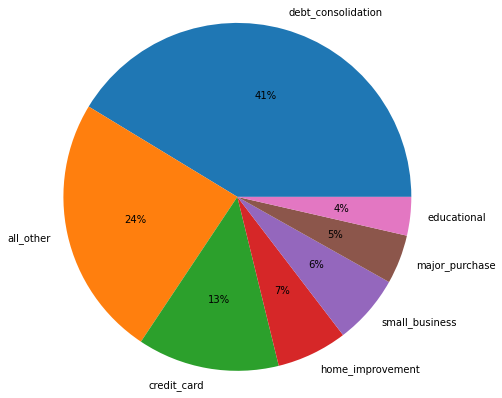

In [7]:
#plot a pie chart to show the distribution of loan purpose
plt.pie(x=df_loan['purpose'].value_counts(), labels = df_loan['purpose'].value_counts().index,radius=2, autopct="%1.0f%%")

The purposes of loan for most of the people are debt_consolidation (41%).

<AxesSubplot:xlabel='credit.policy', ylabel='count'>

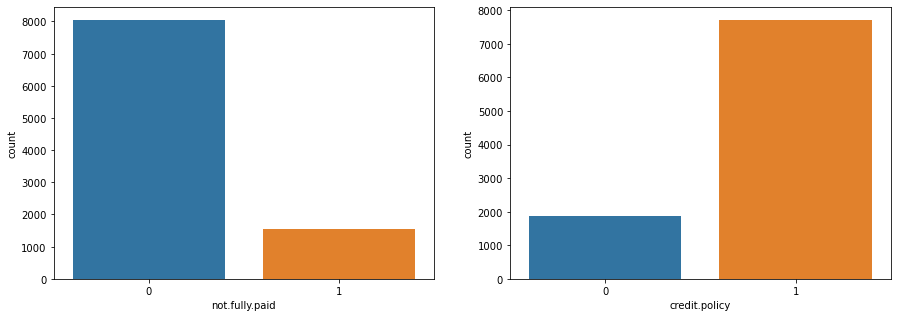

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.countplot(ax=axes[0], data=df_loan, x='not.fully.paid' )
sns.countplot(ax=axes[1], data=df_loan, x='credit.policy')

There is a class imbalance problems in not.fully.paid and credit.policy respectively, which may affect to the results of our prediction.

<AxesSubplot:xlabel='credit.policy', ylabel='count'>

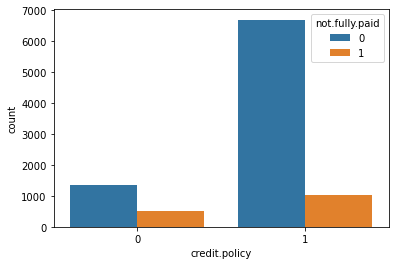

In [9]:
#credit.policy vs not.fully.paid
sns.countplot(x='credit.policy', hue = "not.fully.paid", data=df_loan)

The ratio of paying back and not paying back in the class of not satisfying the requirements for the credit policy is obviously higher than those who are satisfy with the requirements.

However, the numbers of people who satisfied the requirements for the credit policy thus not paying back the full amount of their loan are higher, which are around 13% of the total numbers of people who met the requirements for the credit policy.

<AxesSubplot:xlabel='dti', ylabel='Count'>

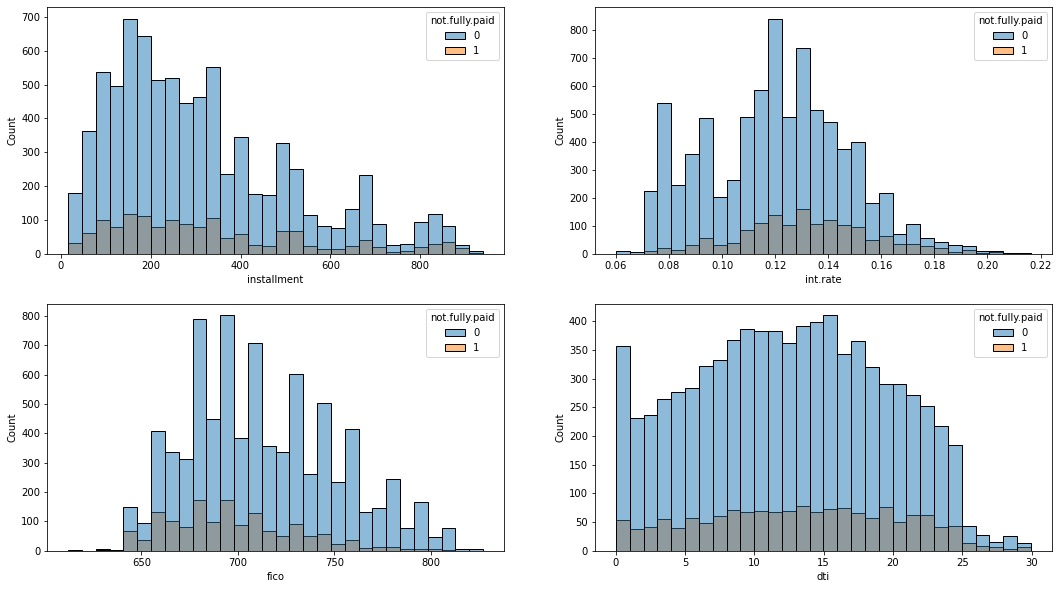

In [10]:
#plot the histogram to show the distributions of some features upon'not fully paid' and 'fully paid'.
fig, axes = plt.subplots(2, 2, figsize=(18, 10))
sns.histplot(ax=axes[0, 0], data=df_loan, x=df_loan['installment'], hue='not.fully.paid', bins=30)
sns.histplot(ax=axes[0, 1], data=df_loan, x=df_loan['int.rate'], hue='not.fully.paid', bins=30)
sns.histplot(ax=axes[1, 0], data=df_loan, x=df_loan['fico'], hue='not.fully.paid', bins=30)
sns.histplot(ax=axes[1, 1], data=df_loan, x=df_loan['dti'], hue='not.fully.paid', bins=30)

The distributions upon'not fully paid' and 'fully paid' are quite similar.

<AxesSubplot:xlabel='dti', ylabel='Count'>

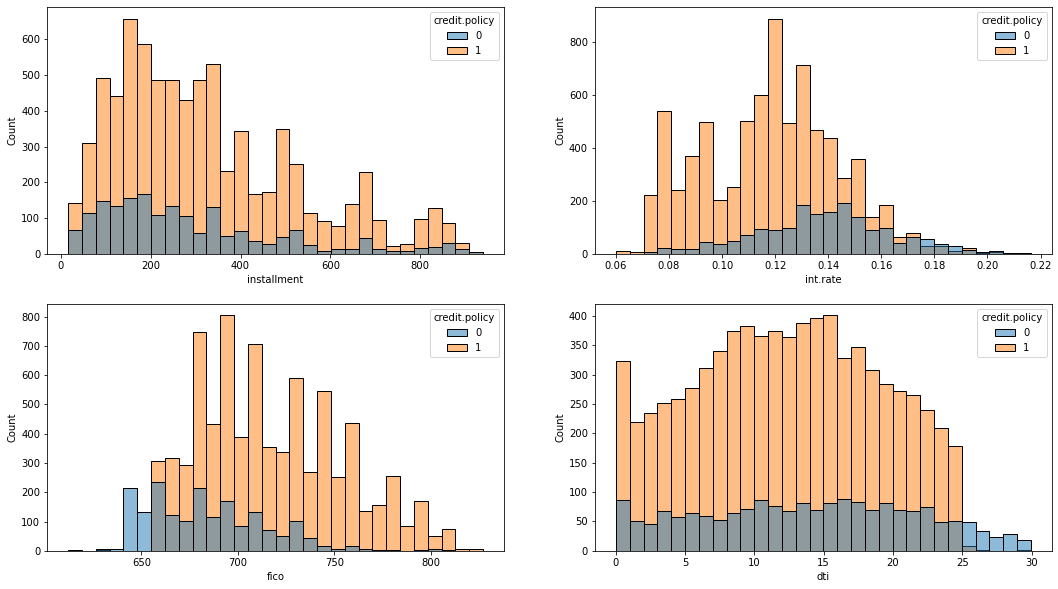

In [11]:
#plot the histogram to show the distributions of some features upon'meet the credit policy' and 'not meet the credit policy.
fig, axes = plt.subplots(2, 2, figsize=(18, 10))
sns.histplot(ax=axes[0, 0], data=df_loan, x=df_loan['installment'], hue='credit.policy', bins=30)
sns.histplot(ax=axes[0, 1], data=df_loan, x=df_loan['int.rate'], hue='credit.policy', bins=30)
sns.histplot(ax=axes[1, 0], data=df_loan, x=df_loan['fico'], hue='credit.policy', bins=30)
sns.histplot(ax=axes[1, 1], data=df_loan, x=df_loan['dti'], hue='credit.policy', bins=30)

The distribution of installment and the distribution of dti upon'meet the credit policy' and 'not meet the credit policy' are quite similar.<br>
However, there are some differences in the distribution of int.rate and the distribution of fico upon'meet the credit policy' and 'not meet the credit policy'.

In [12]:
# get the correlation relationship of the dataset
df_loan.corr()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
credit.policy,1.000000,-0.294089,0.058770,0.034906,-0.090901,0.348319,0.099026,-0.187518,-0.104095,-0.535511,-0.076318,-0.054243,-0.158119
int.rate,-0.294089,1.000000,0.276140,0.056383,0.220006,-0.714821,-0.124022,0.092527,0.464837,0.202780,0.156079,0.098162,0.159552
installment,0.058770,0.276140,1.000000,0.448102,0.050202,0.086039,0.183297,0.233625,0.081356,-0.010419,-0.004368,-0.032760,0.049955
log.annual.inc,0.034906,0.056383,0.448102,1.000000,-0.054065,0.114576,0.336896,0.372140,0.054881,0.029171,0.029203,0.016506,-0.033439
dti,-0.090901,0.220006,0.050202,-0.054065,1.000000,-0.241191,0.060101,0.188748,0.337109,0.029189,-0.021792,0.006209,0.037362
fico,0.348319,-0.714821,0.086039,0.114576,-0.241191,1.000000,0.263880,-0.015553,-0.541289,-0.185293,-0.216340,-0.147592,-0.149666
days.with.cr.line,0.099026,-0.124022,0.183297,0.336896,0.060101,0.263880,1.000000,0.229344,-0.024239,-0.041736,0.081374,0.071826,-0.029237
revol.bal,-0.187518,0.092527,0.233625,0.372140,0.188748,-0.015553,0.229344,1.000000,0.203779,0.022394,-0.033243,-0.031010,0.053699
revol.util,-0.104095,0.464837,0.081356,0.054881,0.337109,-0.541289,-0.024239,0.203779,1.000000,-0.013880,-0.042740,0.066717,0.082088
inq.last.6mths,-0.535511,0.202780,-0.010419,0.029171,0.029189,-0.185293,-0.041736,0.022394,-0.013880,1.000000,0.021245,0.072673,0.149452


<AxesSubplot:>

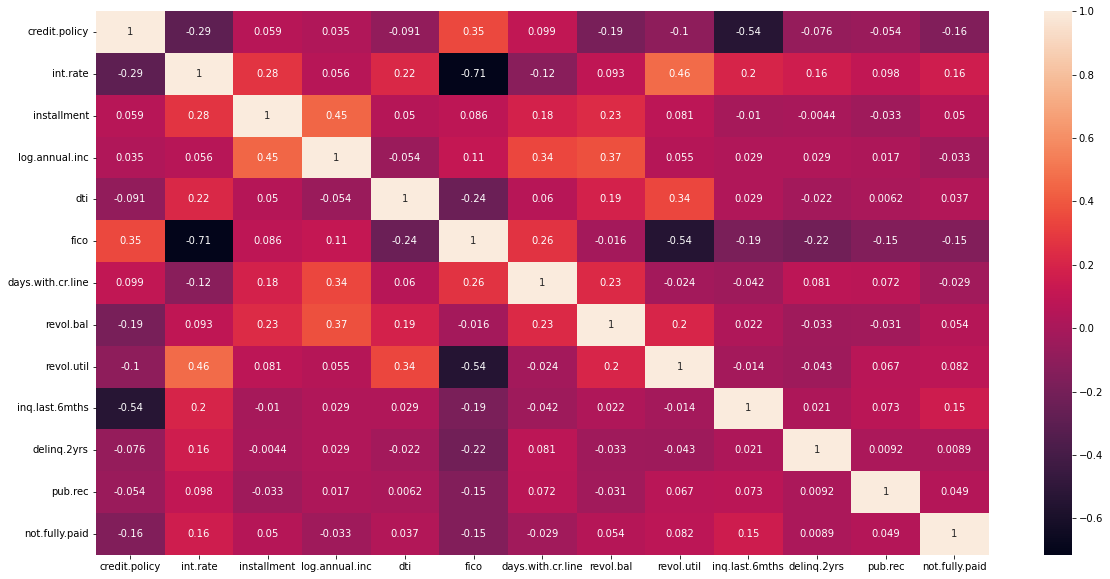

In [13]:
#plot a heatmap to show the correlation relationship of the dataset
plt.figure(figsize = (20, 10))
sns.heatmap(df_loan.corr(), annot= True)

Most of the correlated relationships is weak, and there are some negative correlated relationships in the dataset.<br>
The correlated relationship between fico and int.rate is -0.71 which is a strong relationship.

Text(0, 0.5, 'int.rate')

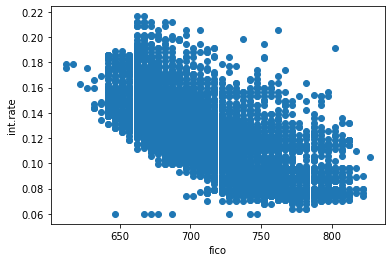

In [14]:
#plot the scatter plot to show the correlated relationships between fico and int.rate
plt.scatter(df_loan['fico'], df_loan['int.rate'])
plt.xlabel("fico")
plt.ylabel("int.rate")

The correlated relationship between fico and int.rate is in a strong linear form and has some outlier.<br>
The graph showed that the int.rate would be higher for the people with a lower fico score.

# Proposed Prediction Model

Logistic Regression and K-Nearest Neighbors (KNN) algorithm  have been implemented in this project.<br>
<br>
Test Size: 30%, Train Size: 70%, Random State: 1235<br>
<br>
For KNN, the default value of K (k=5) would be used at first. After plotting the error rate vs K-value, the K value would be adjusted to minimaize the error rate.<br>
<br>
credit.policy and not.fully.paid would be the dependent variables of our predictions:
1.credit.policy: to predict if the customer meets credit underwriting criteria
2.not.fully.paid: to predict if the customer will repay the loan fully<br>
<br>
The column of purpose which is categorical variable would be convert to dummy variable.


# Logistic Regression for not.fully.paid

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
df_loan = pd.get_dummies(df_loan, columns=['purpose'],drop_first=True)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(df_loan.drop('not.fully.paid',axis=1), 
                                                    df_loan['not.fully.paid'], test_size=0.30, 
                                                    random_state=1235)

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
logmodel = LogisticRegression(solver='lbfgs', max_iter=9579)
logmodel.fit(X_train,y_train)

LogisticRegression(max_iter=9579)

In [20]:
predictions = logmodel.predict(X_test)

In [21]:
predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [22]:
from sklearn.metrics import classification_report, confusion_matrix

In [23]:
print(confusion_matrix(y_test,predictions))

[[2403    5]
 [ 459    7]]


In [24]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2408
           1       0.58      0.02      0.03       466

    accuracy                           0.84      2874
   macro avg       0.71      0.51      0.47      2874
weighted avg       0.80      0.84      0.77      2874



# KNN for not.fully.paid

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
scaler = StandardScaler()

In [27]:
scaled_features = scaler.fit_transform(df_loan.drop('not.fully.paid',axis=1))

In [28]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df_loan['not.fully.paid'],
                                                    test_size=0.30, random_state=1235)

In [29]:
from sklearn.neighbors import KNeighborsClassifier

In [30]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
print('DEFAULT: K=5')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

DEFAULT: K=5


[[2312   96]
 [ 439   27]]


              precision    recall  f1-score   support

           0       0.84      0.96      0.90      2408
           1       0.22      0.06      0.09       466

    accuracy                           0.81      2874
   macro avg       0.53      0.51      0.49      2874
weighted avg       0.74      0.81      0.77      2874



In [31]:
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

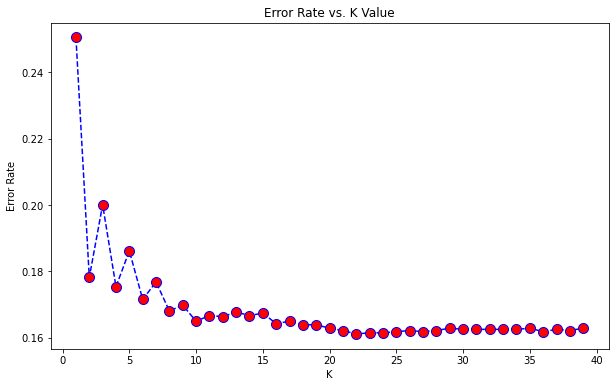

In [32]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Above graph showed that the error rate would be lowest when the K-value is 22 so we will choose the k=22 to minimize the error rate. 

In [33]:
knn = KNeighborsClassifier(n_neighbors=22)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=23')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=23


[[2402    6]
 [ 457    9]]


              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2408
           1       0.60      0.02      0.04       466

    accuracy                           0.84      2874
   macro avg       0.72      0.51      0.47      2874
weighted avg       0.80      0.84      0.77      2874



# Logistic Regression for credit.policy

In [34]:
X_train, X_test, y_train, y_test = train_test_split(df_loan.drop('credit.policy',axis=1), 
                                                    df_loan['credit.policy'], test_size=0.30, 
                                                    random_state=1235)

In [35]:
logmodel = LogisticRegression(solver='lbfgs', max_iter=9579)
logmodel.fit(X_train,y_train)

LogisticRegression(max_iter=9579)

In [36]:
predictions = logmodel.predict(X_test)

In [37]:
predictions

array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

In [38]:
print(confusion_matrix(y_test,predictions))

[[ 334  210]
 [  72 2258]]


In [39]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.82      0.61      0.70       544
           1       0.91      0.97      0.94      2330

    accuracy                           0.90      2874
   macro avg       0.87      0.79      0.82      2874
weighted avg       0.90      0.90      0.90      2874



# KNN for credit.policy

In [40]:
scaler = StandardScaler()

In [41]:
scaled_features = scaler.fit_transform(df_loan.drop('credit.policy',axis=1))

In [42]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df_loan['credit.policy'],
                                                    test_size=0.30, random_state=1235)

In [43]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
print('DEFAULT: K=5')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

DEFAULT: K=5


[[ 264  280]
 [  38 2292]]


              precision    recall  f1-score   support

           0       0.87      0.49      0.62       544
           1       0.89      0.98      0.94      2330

    accuracy                           0.89      2874
   macro avg       0.88      0.73      0.78      2874
weighted avg       0.89      0.89      0.88      2874



In [44]:
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

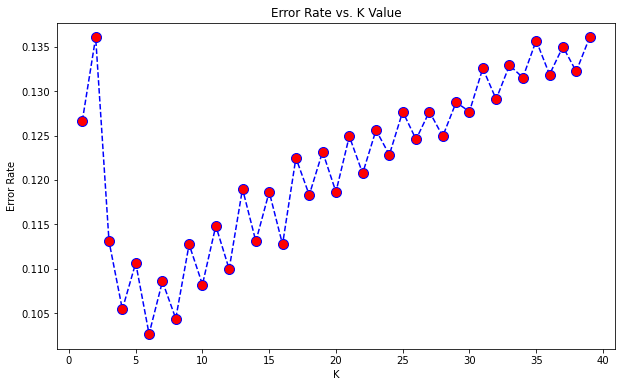

In [45]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Above graph showed that the error rate would be lowest when the K-value is 6 so we will choose the k=6 to minimize the error rate. 

In [46]:
knn = KNeighborsClassifier(n_neighbors=6)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=6')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=6


[[ 306  238]
 [  57 2273]]


              precision    recall  f1-score   support

           0       0.84      0.56      0.67       544
           1       0.91      0.98      0.94      2330

    accuracy                           0.90      2874
   macro avg       0.87      0.77      0.81      2874
weighted avg       0.89      0.90      0.89      2874



# Significant Findings

- The prediction of 1 for credit.policy in both model has precision and recall over 90%.
- The prediction of 0 for credit.policy in both model has precision over 80% and fair recall (61% in logistic regression and 56% in KNN).
- The logistic regression model for credit.policy has same accuracy (90%) as the KNN model for credit.policy.
- The prediction of 0 for not.fully.paid in both model has precision over 80% and very high recall (nearly 100%).
- The prediction of 1 for not.fully.paid in both model has fair precision nearly 60% and poor recall (2% in logistic regression and KNN).
- The logistic regression model for not.fully.paid has a same accuracy (84%) as the KNN model for not.fully.paid.
- The prediction of 1 for not.fully.paid in logistic regression has much lower precision and recall than credit.policy.
- Both models for not.fully.paid have comparable f1-score.

# Discussion

- Both models are performing similarly in prediction for the two columns evidenced by comparable f1-score.
- Overall accuracy in prediction of credit.policy is descent.
- The prediction of not-fully-paid is failed. The accuracy in prediction of loan not-fully-paid (outcome = 1)is very low. This may be due to the imbalance of data (84% 0 vs 16% 1).